# Homework #8: Computational Questions

All computations should be done in this notebook using the R kernel. This is your first opportunity to get familiar with R outside of class, so please take your time on the problems that require it. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. Follow all instructions very closely or points will be deducted.

#### You will be required to submit this notebook, fully compiled with your solutions, as an Jupyter Notebook and as an HTML file to Canvas by 5pm on Friday, April 19.

#### Read and sign the Honor Code Pledge below:

**Honor Code Pledge: _On my honor, as a University of Colorado Boulder student, I have neither given nor received unauthorized assistance on this work._**

### _Juan Vargas-Murillo_

## Problem 1

Let $X$ be the number of heads in $n = 30$ tosses of a coin. Denote the probability of heads as $p$. We hope to test whether the coin is biased toward heads. 

#### (a) Explicitly write out the null and alternative hypotheses. (Try some $\LaTeX$.)


Null Hypothesis: $ H_{0}: p=0.5 $

Alternate Hypothesis: $ H_{a}: p \gt 0.5$.

#### (b) Recall that a Type I Error occurs when the null hypothesis is rejected in favor of the alternate although the null is true. Suppose we define the rejection region to be  $X \ge 20$,  i.e. we reject the null if 20 or more heads occurs in the sample of 30 coin flips. Calculate $\alpha$, the probability of a Type I Error, that is, calculate the probability of the event $\{X\ge20\}$ under conditions of the null hypothesis.

##### (**For this part, and all remaining parts, calculate probabilities exactly, i.e., without using the normal approximation, see $\texttt{pbinom()}$ **)


In [29]:
set.seed(4182019)

In [32]:
N=30; p=0.5;

alpha = 1 - pbinom(19,N,p)

cat("Alpha is equal to ", alpha)

Alpha is equal to  0.04936857

#### (c)  Simulate a sample of 30 fair coin flips under the null hypothesis, and test your hypotheses from part (a). Count the total number of heads and state your conclusion, i.e. reject the null or not? Is your conclusion in error? If so, which type?


In [33]:
set.seed(4182019)
Flip1Coin = function(n) sample(c("Heads", "Tails"), n, rep = T)
flips = Flip1Coin(N)

In [34]:
table(flips)

flips
Heads Tails 
   13    17 

In [45]:
phat <- 13/N
pq <- p*(1-p)

In [46]:
test.statistic <- (phat-p)/sqrt(pq / N)
cat("Calculated test statistic, z, ", test.statistic)
cat("\nZ_a ",qnorm(alpha))

result <- test.statistic >= qnorm(alpha)
result

Calculated test statistic, z,  -0.7302967
Z_a  -1.651007

[1] TRUE

**STUDENT ANSWER**: We can reject the null because our $z$ is greater than $z_a$. At the significance level of $\alpha = 0.04936857$.

#### (d) Recall that Type II Error occurs when the null hypothesis is not rejected when in fact the null is false. We will calculate the probability of a Type II Error under the alternative hypothesis, note that if we assume $p$ is greatet than $0.5$, that is, if we assume $p=p_{1}>0.5$ then
$$
P(\text{Type II Error})
=P(\text{falsely accept $H_{0}$})
=P(X<20\text{ with $p=p_{0}$})
\textrm{ where we assume $X\sim\text{Bin}(n=30,p=p_{0})$.}
$$
#### Create a sequence of a 100 numbers from $0.5$ to $1$ and calculate the power, $1-\beta$, of each test. Recall that $\beta$ is the probability of a Type II error, i.e $\beta = P(X<20\text{ with $p=p_{0}$})$.

#### Now make a plot of the power ($y$-axis) vs $p$ ($x$-axis). Interpret/comment on this plot. In particular, as $p$ gets further from the $p$ specified under the null hypothesis, what happens to the power?



In [9]:
ps <- seq(0.5, 1, length.out = 100)

In [10]:
betas <- pbinom(19, size = N, p = ps)

In [11]:
power <- 1 - betas

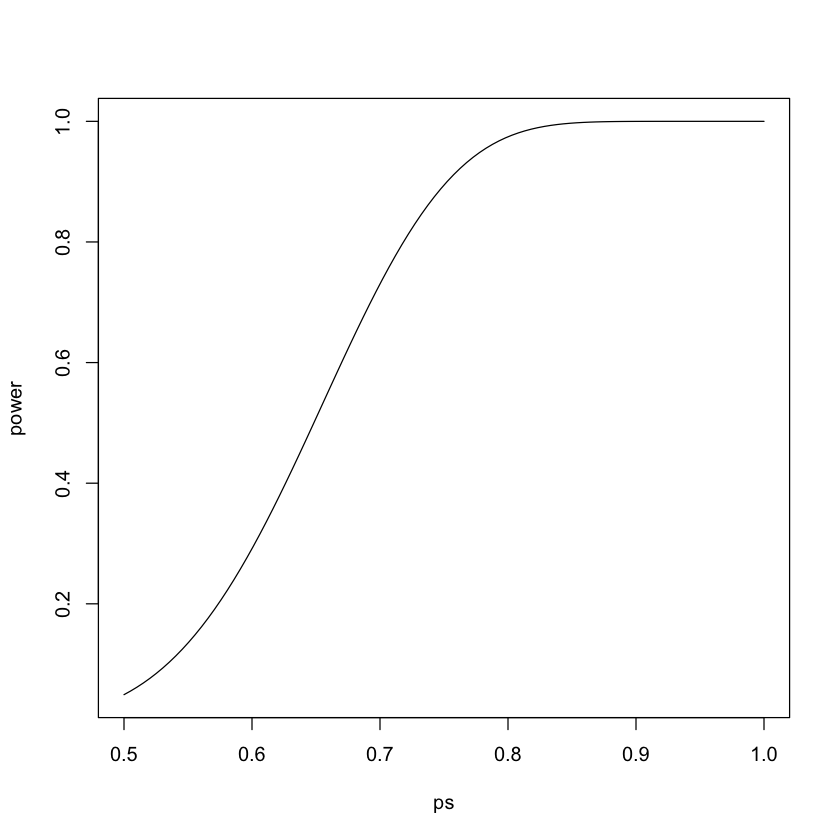

In [12]:
plot(ps, power, type='l')

**STUDENT ANSWER**: As $p$ gets further from the $p$ specified under the null hypothesis the power approaches 1, that is as we try to specify a rejection regions based on the largest value of $\alpha$ that can be tolerated, this makes $\beta$ as small as possible. And when $\beta$ is close to zero $1 - \beta$ is 1.

## Problem 2

Consider the test $H_0: p \le 0.5$ vs $H_1: p > 0.5$, where $p$ is a population proportion. Let $\alpha = 0.05$ and let $n$, the sample size, be 200.

#### (a) Simulate $m = 100,000$ datasets where the true population proportion is $p = 0.5$, use $ {\tt rbinom()}$. Calculate the p-value for the test above for each dataset (note that CLT applies here). Print a histogram of these p-values. Comment on the distribution.



In [14]:
m = 100000; n = 200; p = 0.5;

data <- rbinom(m, size=n, p)


phat <- data / 200

p.values <- 1 - pnorm((phat - p)/ sqrt((p*(1-p))/200))


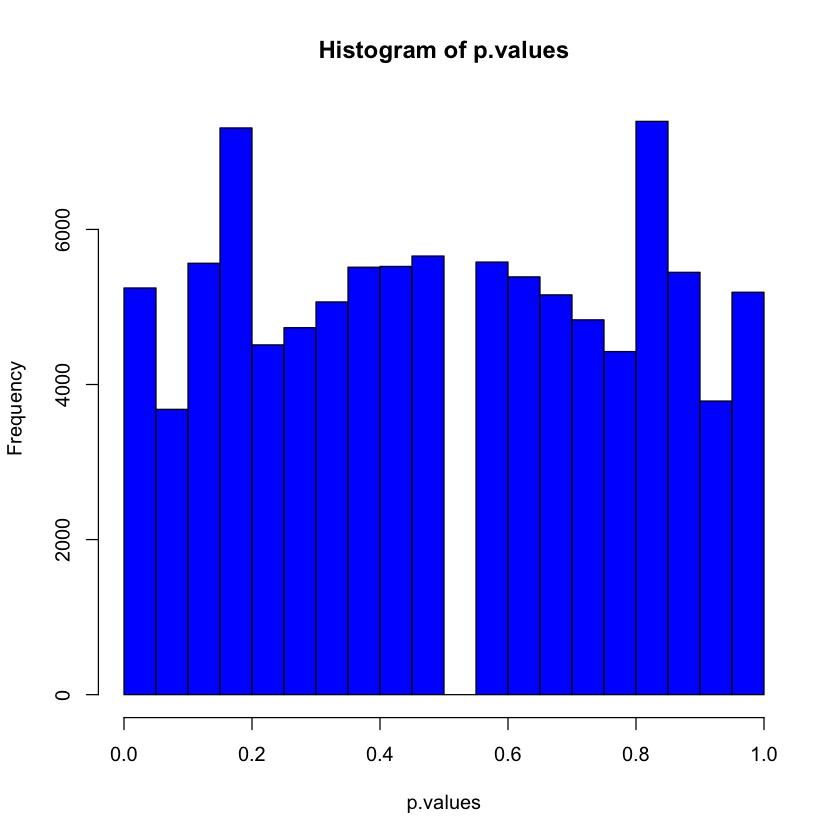

In [16]:
hist(p.values, col="blue")


![Optimus Prime Distribution of P-Values](https://pre00.deviantart.net/60fa/th/pre/i/2016/159/4/7/optimus_prime_head_study_transformers_5_by_bradleyfrew18-da5fqpa.jpg "Optimus Prime Distribution of P-Values")


**STUDENT ANSWER**: The distribution of the p-values is similar to the Optimus Prime Distribution (jk). The distribution of the p-values seems to be somewhat uniform. Because we are approximating a continuous distribution with a discrete case it is not as smoot as it can be. 

#### (b)  In part (a), find the probability that a p-value will be less than $0.05$. How does this probability compare with $\alpha=0.05$?


In [17]:
p.value.prob <- sum(p.values < 0.05) / m
p.value.prob

[1] 0.05245

**STUDENT ANSWER**: The probability of the p-values less than 0.05 are approximately equal to the significance level of $\alpha = 0.05$

#### (c) Considering the same test, simulate $m = 100,000$ datasets where the true population proportion is $p = 0.6$. Calculate the p-value for each sample. Print a histogram of these p-values. Comment on the distribution.


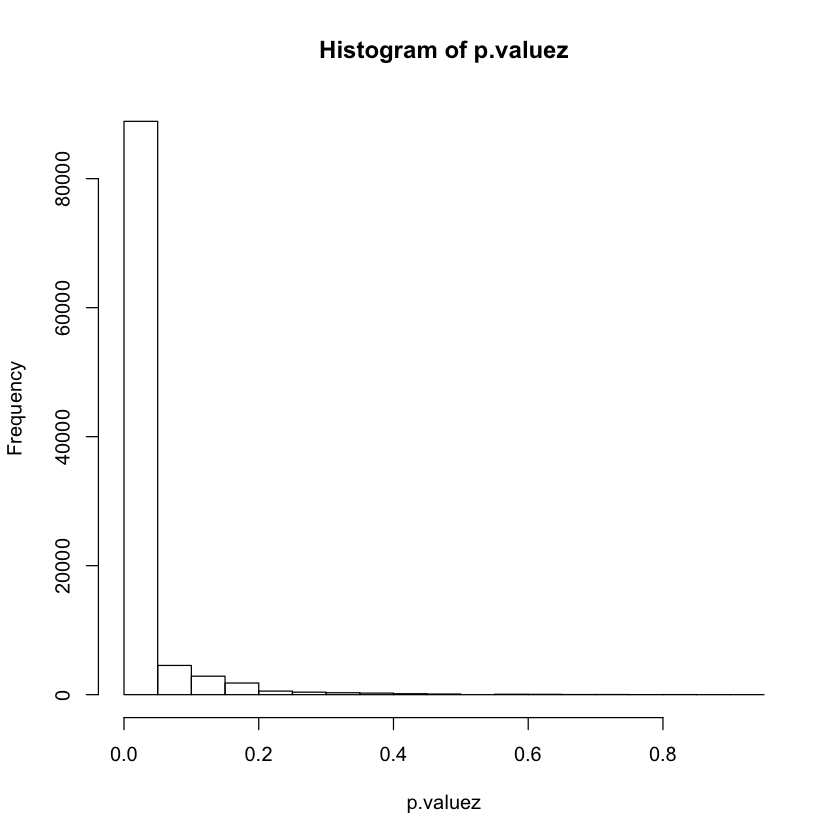

In [19]:
m = 100000; n = 200; p_a = 0.6;

data <- rbinom(m, size=n, p_a)


phat <- data / 200

p.valuez <- 1 - pnorm((phat - p)/ sqrt((p*(1-p))/200))
hist(p.valuez)

**STUDENT ANSWER**: Most of our values are close to zero telling us that we have strong indication to reject the null hypothesis because most of our calculated p-values are very small. 

#### (d) What is the percentage of p-values (from part (c)) that are greater than $\alpha=0.05$? What is the probability of type II error?


In [50]:
sum(p.valuez > 0.05)/m

[1] 0.1111

**STUDENT ANSWER**: The probability of a type II error is 10%.